In [1]:
# Additional torch-related imports
import torch
from torch import cat, no_grad, manual_seed
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim
from torch.nn import(
    Module,
    Conv2d,
    Linear,
    Dropout2d,
    NLLLoss,
    MaxPool2d,
    Flatten,
    Sequential,
    ReLU,
    BCELoss
)
import torch.nn.functional as F
import numpy as np

In [2]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Set random seed for reproducibility
torch.manual_seed(42)

batch_size = 32  # 32 was working nice | Adjust according to your requirements
data_root = "./birdsong/"  # Path to your custom dataset root directory

# Define transformations to be applied to the images
data_transform = transforms.Compose([
    #transforms.Resize((400, 1000)),  # Resize images to a standard size
    transforms.ToTensor(),           # Convert images to PyTorch tensors
    #transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize pixel values
])

# Load the custom dataset
custom_dataset = datasets.ImageFolder(root=data_root, transform=data_transform)

# Split the dataset into train and test
# You can define a custom train/test split or use the whole dataset for training
# Here, I'm using the same dataset for both training and testing, but you can split it differently if needed.
train_dataset = custom_dataset

# Define data loaders for train and test datasets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Check the length of the dataset
print("Number of training samples:", len(train_dataset))

Number of training samples: 1866


In [3]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Set random seed for reproducibility
torch.manual_seed(42)

batch_size = 32  # Adjust according to your requirements
data_root = "./birdsong_test/"  # Path to your custom dataset root directory

# Define transformations to be applied to the images
data_transform = transforms.Compose([
    #transforms.Resize((400, 1000)),  # Resize images to a standard size
    transforms.ToTensor(),           # Convert images to PyTorch tensors
    #transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize pixel values
])

# Load the custom dataset
custom_dataset = datasets.ImageFolder(root=data_root, transform=data_transform)

# Split the dataset into train and test
# You can define a custom train/test split or use the whole dataset for training
# Here, I'm using the same dataset for both training and testing, but you can split it differently if needed.
test_dataset = custom_dataset

# Define data loaders for train and test datasets
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)  # No need to shuffle test data

# Check the length of the dataset
print("Number of test samples:", len(test_dataset))

Number of test samples: 464


In [3]:
import  matplotlib.pyplot as plt

In [ ]:
x_train = pca.fit_transform(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_ * 100)[-1]
print("Cumulative sum on train :", cumsum)

x_test = pca.transform(x_test)
cumsum = np.cumsum(pca.explained_variance_ratio_ * 100)[-1]
print("Cumulative sum on train :", cumsum)

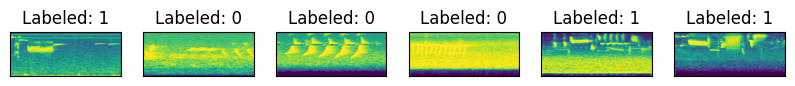

In [5]:
n_samples_show = 6

data_iter = iter(train_loader)
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

while n_samples_show > 0:
    images, targets = data_iter.__next__()

    axes[n_samples_show - 1].imshow(images[0, 0].numpy())
    axes[n_samples_show - 1].set_xticks([])
    axes[n_samples_show - 1].set_yticks([])
    axes[n_samples_show - 1].set_title("Labeled: {}".format(targets[0].item()))

    n_samples_show -= 1

In [6]:
# Necessary imports

import numpy as np
import matplotlib.pyplot as plt

from torch import Tensor
from torch.nn import Linear, CrossEntropyLoss, MSELoss
from torch.optim import LBFGS

from qiskit import QuantumCircuit
# from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector

from qiskit.opflow import AerPauliExpectation

# Set seed for random generators
algorithm_globals.random_seed = 42

ImportError: cannot import name 'TwoLayerQNN' from 'qiskit_machine_learning.neural_networks' (c:\Users\Yash Thakar\PROGRAMMING\Quantum\env\Lib\site-packages\qiskit_machine_learning\neural_networks\__init__.py)

In [ ]:
# Define and create QNN
def create_qnn():
    feature_map = ZZFeatureMap(2, reps=5) #5 was working nice
    ansatz = RealAmplitudes(2, reps=5)
    qc = QuantumCircuit(2)
    qc.compose(feature_map, inplace=True)
    qc.compose(ansatz, inplace=True)

    # REMEMBER TO SET input_gradients=True FOR ENABLING HYBRID GRADIENT BACKPROP
    qnn = EstimatorQNN(
        circuit=qc,
        input_params=feature_map.parameters,
        weight_params=ansatz.parameters,
        input_gradients=True,
    )
    sampler_qnn = SamplerQNN(
    circuit=qc,
    input_params=feature_map.parameters,
    weight_params=ansatz.parameters,
    input_gradients=True,
)

    return sampler_qnn


qnn4 = create_qnn()

In [10]:
# Define torch NN module

class Net(Module):
    def __init__(self, qnn):
        super().__init__()
        self.conv1 = Conv2d(3, 2, kernel_size=5)
        self.conv2 = Conv2d(2, 16, kernel_size=5)
        self.conv3 = Conv2d(16, 64, kernel_size=5)
        self.dropout = Dropout2d()
        self.fc2 = Linear(356224, 2)
        self.qnn = TorchConnector(qnn)  # Apply torch connector, weights chosen
        self.fc3 = Linear(4, 1)  # 1-dimensional output from QNN

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc2(x)
        x = self.qnn2(x)  # apply QNN
        x = self.fc3(x)
        return torch.cat((x, 1 - x), -1)


model4 = Net(qnn4)

In [11]:
# Define model, optimizer, and loss function
#optimizer = optim.Adam(model4.parameters(), lr=0.1)
optimizer = optim.SGD(model4.parameters(), lr=0.1, momentum=0.9)
loss_func = CrossEntropyLoss()

# Start training
epochs = 25  # Set number of epochs
loss_list = []  # Store loss history
model4.train()  # Set model to training mode

for epoch in range(epochs):
    total_loss = []
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad(set_to_none=True)  # Initialize gradient
        output = model4(data)  # Forward pass
        loss = loss_func(output, target)  # Calculate loss
        print(loss)
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize weights
        total_loss.append(loss.item())  # Store loss
    loss_list.append(sum(total_loss) / len(total_loss))
    print("Training [{:.0f}%]\tLoss: {:.4f}".format(100.0 * (epoch + 1) / epochs, loss_list[-1]))

tensor(0.9340, grad_fn=<NllLossBackward0>)
tensor(0.9354, grad_fn=<NllLossBackward0>)
tensor(0.9629, grad_fn=<NllLossBackward0>)
tensor(0.7110, grad_fn=<NllLossBackward0>)
tensor(0.7958, grad_fn=<NllLossBackward0>)
tensor(0.6630, grad_fn=<NllLossBackward0>)
tensor(0.8042, grad_fn=<NllLossBackward0>)
tensor(0.7337, grad_fn=<NllLossBackward0>)
tensor(0.7371, grad_fn=<NllLossBackward0>)
tensor(0.8865, grad_fn=<NllLossBackward0>)
tensor(0.7564, grad_fn=<NllLossBackward0>)
tensor(0.7691, grad_fn=<NllLossBackward0>)
tensor(0.7531, grad_fn=<NllLossBackward0>)
tensor(0.7256, grad_fn=<NllLossBackward0>)
tensor(0.6631, grad_fn=<NllLossBackward0>)
tensor(0.6643, grad_fn=<NllLossBackward0>)
tensor(0.7677, grad_fn=<NllLossBackward0>)
tensor(0.9798, grad_fn=<NllLossBackward0>)
tensor(0.8946, grad_fn=<NllLossBackward0>)
tensor(0.8895, grad_fn=<NllLossBackward0>)
tensor(0.8353, grad_fn=<NllLossBackward0>)
tensor(0.7314, grad_fn=<NllLossBackward0>)
tensor(0.6694, grad_fn=<NllLossBackward0>)
tensor(0.69

In [1]:
# Plot loss convergence
plt.plot(loss_list)
plt.title("Hybrid NN Training Convergence")
plt.xlabel("Training Iterations")
plt.ylabel("Cross Entropy Loss")
plt.show()

NameError: name 'plt' is not defined

In [11]:
model4.eval()  # set model to evaluation mode
with no_grad():

    correct = 0
    for batch_idx, (data, target) in enumerate(test_loader):
        output = model4(data)
        if len(output.shape) == 1:
            output = output.reshape(1, *output.shape)

        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

        loss = loss_func(output, target)
        total_loss.append(loss.item())

    print(
        "Performance on test data:\n\tLoss: {:.4f}\n\tAccuracy: {:.1f}%".format(
            sum(total_loss) / len(total_loss), correct / len(test_loader) / batch_size * 100
        )
    )

Performance on test data:
	Loss: 0.6973
	Accuracy: 52.1%


In [12]:
model4.eval()  # set model to evaluation mode
with no_grad():

    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        output = model4(data)
        if len(output.shape) == 1:
            output = output.reshape(1, *output.shape)

        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

        loss = loss_func(output, target)
        total_loss.append(loss.item())

    print(
        "Performance on train data:\n\tLoss: {:.4f}\n\tAccuracy: {:.1f}%".format(
            sum(total_loss) / len(total_loss), correct / len(train_loader) / batch_size * 100
        )
    )

Performance on train data:
	Loss: 0.7070
	Accuracy: 53.3%
